Urban Data Science & Smart Cities <br>
URSP688Y <br>
Instructor: Chester Harvey <br>
Urban Studies & Planning <br>
National Center for Smart Growth <br>
University of Maryland

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[<img src="https://colab.research.google.com/assets/colab-badge.svg">](https://colab.research.google.com/github/ncsg/ursp688y_sp2024/blob/main/exercises/exercise05/exercise05.ipynb)

# Exercise 5

## Problem

So far, we've been examining affordable housing in DC with summary tables. Some of you have figured out how to incorporate graphic variables into these tables, using color to highlight minimums and maximums (good Googling!). However, we can often communicate much more convincingly, and even see patterns better ourselves, by making charts.

For this week's exercise, please:

- Write a function that makes a plot communicating a valuable statistic about affordable housing in each ward. You get to choose what's most valuable to show.
- The function should take an argument to filter by project status so it can be used to generate a plot representing projects that are either completed, under construction, or in the pipeline. (The same generalized function should be able to represent projects with any status.)
    - Optional: Can you specify the argument so it's also easy to see data for projects with all three statuses at once?
    - Optional: The function may also take additional arguments for whatever customization you think would be valuable for an end-user.
- The function should be stored in a module, loaded into a notebook, and called at least once in the notebook to demonstrate it.
- Please make a pull request with a folder containing your module (`.py` file), notebook (`.ipynb` file), any CSV files your analysis depends on, and any additional graphics files.

Bonus: Make it even better by exporting one plot to Illustrator or another software and fine-tuning it. Then include it in your PR folder and use markdown to show the resulting graphic in your notebook. (Hint: I demonstrate how to do this with markdown in the demo05 notebook.)

## Data

CSVs for the affordable housing dataset and ward census data are included on GitHub at `exercises/exercise05`. Please feel free to draw on other datasets, though this is not required. If you do use other data, please cite them, preferably with links, with markdown in your notebook or through comments in your code.


In [ ]:
# Import your module

# Call your main function
# Import dependencies
import pandas as pd
import os
os.getcwd()

'/content'

In [ ]:
#mount mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#absolute path
abs_path ='/content/drive/MyDrive/Exercises_Data_Science_John/affordable_housing (1).csv'
os.path.isfile(abs_path)

True

In [ ]:
#working direction
wd = pd.read_csv ('/content/drive/MyDrive/Exercises_Data_Science_John/affordable_housing (1).csv')


In [ ]:
#reading working data
housing_project = pd.read_csv('/content/drive/MyDrive/Exercises_Data_Science_John/affordable_housing (1).csv')
#housing_project


In [ ]:
#Fix messing data
idx = housing_project[housing_project['MAR_WARD'] == '1'].index[0]
print(f'inconsistent ward label is at index {idx}')
housing_project.at[220, 'MAR_WARD'] = 'Ward 1'
ward_counts = housing_project['MAR_WARD'].value_counts()
ward_counts

inconsistent ward label is at index 220


Ward 5    181
Ward 4    149
Ward 6    145
Ward 8    123
Ward 1    117
Ward 7     88
Ward 2     47
Ward 3     28
Name: MAR_WARD, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

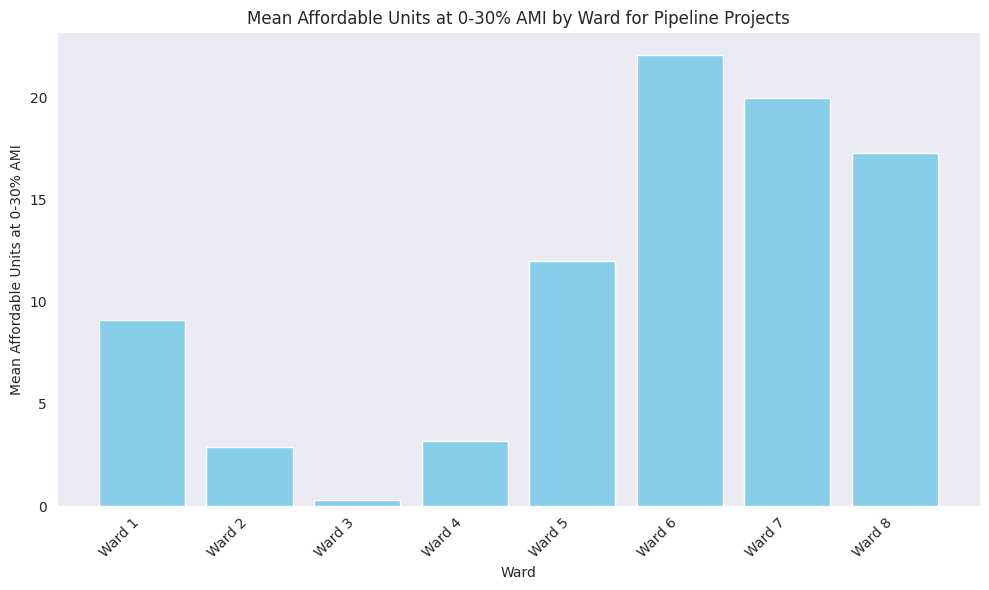

In [ ]:
def plot_affordable_units_by_ward(df, status_category):
    df_filtered = df[df['STATUS_PUBLIC'] == status_category]
    ward_stats = df_filtered.groupby('MAR_WARD')['AFFORDABLE_UNITS_AT_0_30_AMI'].mean().reset_index()

    # Plot the mean AFFORDABLE_UNITS_AT_0_30_AMI for each ward
    plt.figure(figsize=(10, 6))
    plt.bar(ward_stats['MAR_WARD'], ward_stats['AFFORDABLE_UNITS_AT_0_30_AMI'], color='skyblue')
    plt.title(f'Mean Affordable Units at 0-30% AMI by Ward for {status_category} Projects')
    plt.xlabel('Ward')
    plt.ylabel('Mean Affordable Units at 0-30% AMI')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    #return df_filtered

# You can specify the status category to plot (e.g., 'completed', 'uncompleted', 'pipeline')
plot_affordable_units_by_ward(housing_project, 'Pipeline')

In [ ]:

#Function for visualizing all columns in the data set
import matplotlib.pyplot as plt

housing_project = pd.read_csv('/content/drive/MyDrive/Exercises_Data_Science_John/affordable_housing (1).csv')
#housing_project

idx = housing_project[housing_project['MAR_WARD'] == '1'].index[0]
print(f'inconsistent ward label is at index {idx}')
housing_project.at[220, 'MAR_WARD'] = 'Ward 1'

def visualize_categories(housing_project, column):
    category_counts = housing_project[column].value_counts()

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    category_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Counts of Categories in {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    return visualize_categories



inconsistent ward label is at index 220


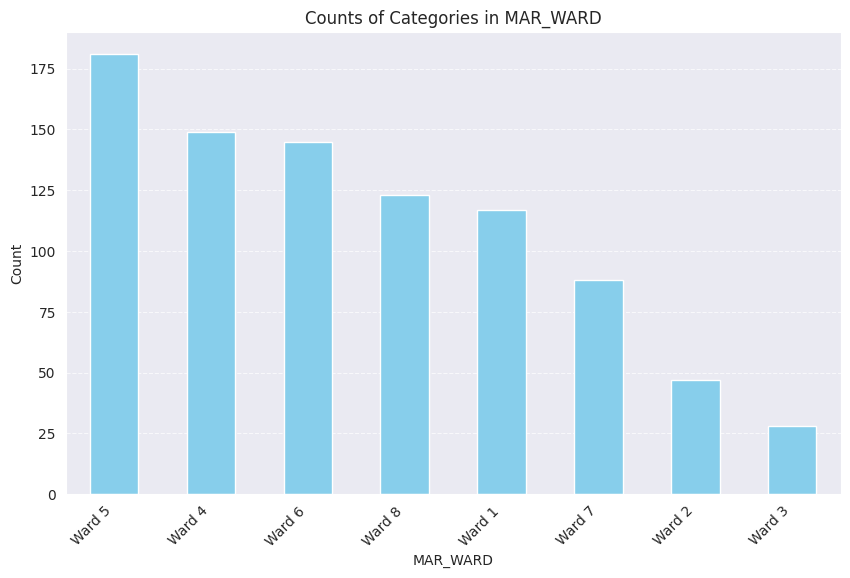

<function __main__.visualize_categories(housing_project, column)>

In [ ]:

# Assuming df is your DataFrame containing the STATUS column
visualize_categories(housing_project, 'MAR_WARD')

<Figure size 1200x600 with 0 Axes>

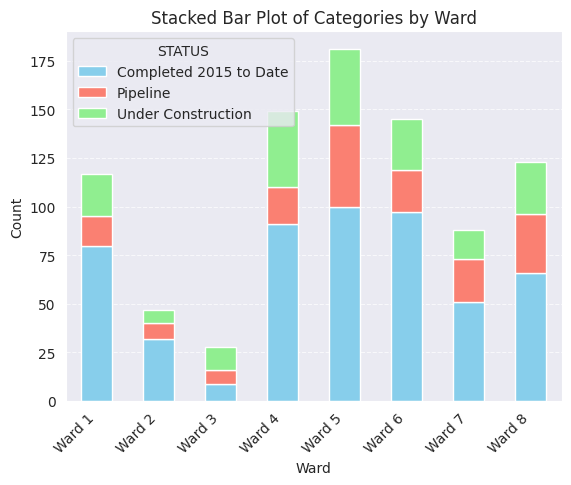

In [ ]:
#function of project Status under each unit
import matplotlib.pyplot as plt

def visualize_categories_by_ward(df):


    # Group the data by WARD and STATUS, then count occurrences
    counts = df.groupby(['MAR_WARD', 'STATUS_PUBLIC']).size().unstack(fill_value=0)

    # Plot the stacked bar chart
    plt.figure(figsize=(12, 6))
    counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon', 'lightgreen'])
    plt.title('Stacked Bar Plot of Categories by Ward')
    plt.xlabel('Ward')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='STATUS')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # return visualize_categories_by_ward


visualize_categories_by_ward(housing_project)